In [1]:
cd ~/DATA/Sentinel/ 

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [2]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
from smoothn import *
import pylab as plt
%matplotlib inline
import mgrs
import pandas as pd
from scipy import interpolate
from nicer_plot import *

1820 8482
0.264071896017


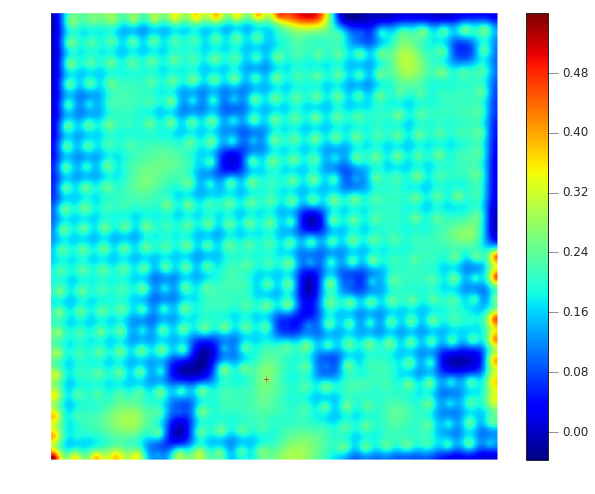

In [27]:
data = parallel_rw_pkl(None, 'Bure0508_atm', 'r')
lat, lon = 48.561944,5.505000
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
print imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-(imgx/1000)*1000).astype(int), (aerosols[1]-(imgy/1000)*1000).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(imgy-(imgy/1000)*1000,imgx-(imgx/1000)*1000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000]

In [21]:
print (sm_aaro[0]*10)[imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000]

0.264071896017


In [13]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160508_160508_Bure_OPE.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
0,08:05:2016,06:17:41,129.262280,0.117130,0.132725,0.145522,0.186715,NaN,NaN,NaN,NaN,NaN,0.276717,NaN,NaN,0.327553,NaN,0.391130,0.440662,1.455664
1,08:05:2016,08:36:33,129.358715,0.055792,0.079842,0.103848,0.164250,NaN,NaN,NaN,NaN,NaN,0.278348,NaN,NaN,0.340135,NaN,0.413877,0.469862,1.434410
2,08:05:2016,14:36:34,129.608727,0.048532,0.060492,0.080735,0.125456,NaN,NaN,NaN,NaN,NaN,0.215581,NaN,NaN,0.265546,NaN,0.330516,0.371305,1.293928
3,08:05:2016,15:14:26,129.635023,0.045341,0.052151,0.068668,0.102792,NaN,NaN,NaN,NaN,NaN,0.175038,NaN,NaN,0.216008,NaN,0.270851,0.306423,1.283543


/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


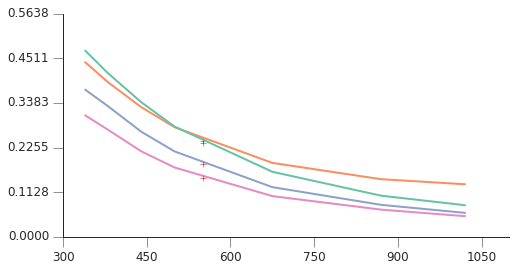

In [14]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [22]:
aot550

[array(0.24320503805936938),
 array(0.23671467041368963),
 array(0.18300293094310718),
 array(0.1486758248029072)]

In [23]:
np.mean(aot550[1:3])

0.20985880067839841

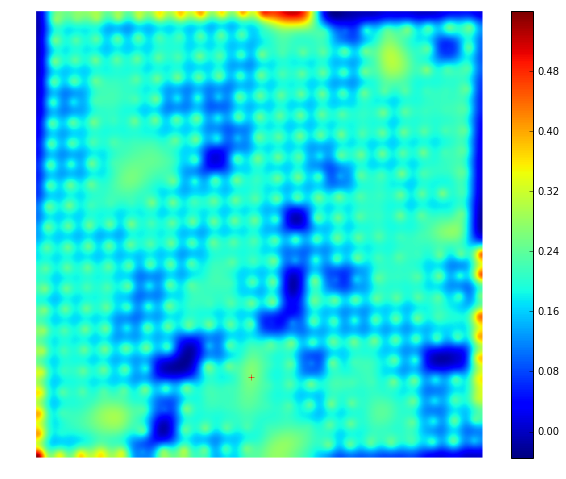

In [7]:
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(482,820 ,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()

In [8]:
mean(aerosols[2])

0.197451043863274

In [16]:
0.085 # 

0.085

In [22]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160429_160429_Munich_University.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
0,29:04:2016,07:46:57,120.324271,NaN,0.037521,0.040341,0.060404,NaN,NaN,NaN,NaN,NaN,0.099654,NaN,NaN,0.134340,NaN,0.166692,0.171793,0.773488
1,29:04:2016,09:13:12,120.384167,NaN,0.039707,0.041943,0.061760,NaN,NaN,NaN,NaN,NaN,0.097033,NaN,NaN,0.126075,NaN,0.156334,0.154581,0.765839
2,29:04:2016,10:13:10,120.425810,NaN,0.041023,0.044059,0.067556,NaN,NaN,NaN,NaN,NaN,0.106468,NaN,NaN,0.138024,NaN,0.171453,0.170661,0.790784
3,29:04:2016,12:13:10,120.509144,NaN,0.039173,0.044367,0.066350,NaN,NaN,NaN,NaN,NaN,0.108693,NaN,NaN,0.139342,NaN,0.177893,0.180402,0.824646
4,29:04:2016,14:39:07,120.610498,NaN,0.039046,0.045571,0.069237,NaN,NaN,NaN,NaN,NaN,0.117450,NaN,NaN,0.148958,NaN,0.192822,0.203776,0.874537
5,29:04:2016,15:16:48,120.636667,NaN,0.035559,0.041892,0.064219,NaN,NaN,NaN,NaN,NaN,0.108851,NaN,NaN,0.139809,NaN,0.179041,0.190767,0.853789
6,29:04:2016,16:50:53,120.702002,NaN,0.036524,0.044650,0.067966,NaN,NaN,NaN,NaN,NaN,0.120510,NaN,NaN,0.153579,NaN,0.196308,0.215104,0.845976


/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


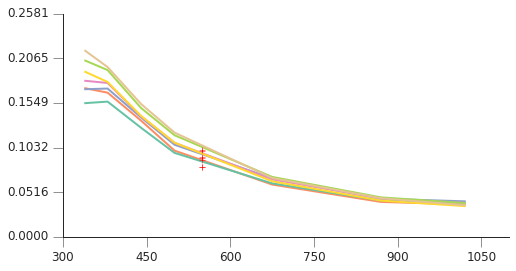

In [23]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [24]:
aot550

[array(0.08052886995027503),
 array(0.08126919220212651),
 array(0.08931873229049186),
 array(0.09174115960328806),
 array(0.09936359809383874),
 array(0.09106678708917862),
 array(0.1004118151659682)]